In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from scipy import linalg
# import utilis.py #C:\Users\Leuro\Desktop\DTU\Computer Vision\Exercice\utilis.py
import sys
sys.path.append(r'C:\Users\Leuro\Desktop\DTU\Computer Vision\Exercice')
import utilis

## QUIZ



### LECTURE 1

#### QUIZ 1

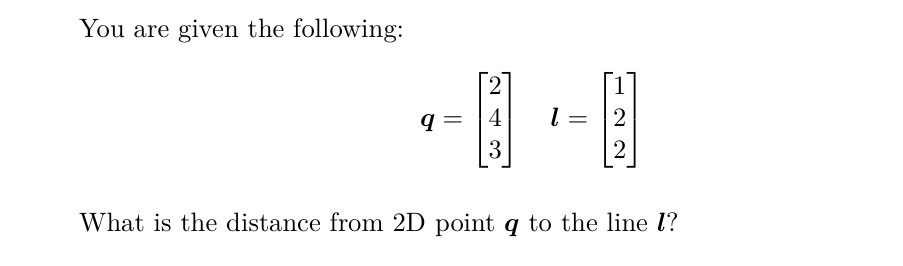

In [2]:
q = np.array([[2], [4], [3]])
l = np.array([[1], [2], [2]])

distance = (np.abs(l.T @ q)) / np.abs(q[2] * np.sqrt(np.square(l[0])+np.square(l[1])))

print(distance)


[[2.38513918]]


### QUIZ 1.B

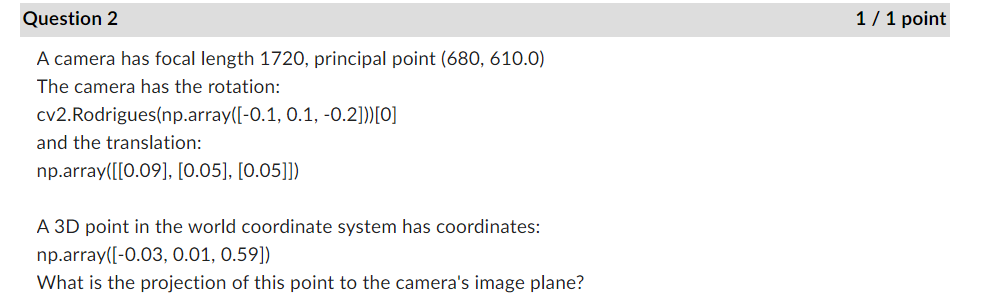

In [3]:
f = 1720
px = 680
py = 610
R = cv2.Rodrigues(np.array([-0.1, 0.1, -0.2]))[0]
# print(R)
t = np.array([[0.09], [0.05], [0.05]])
Q = np.array([[-0.03], [0.01], [0.59]])
K = np.array([[f, 0, px],
              [0, f, py],
              [0, 0, 1]])

p = utilis.projectpoints(K,R,t,Q)

print(p)

[[1023.50377104]
 [ 930.29756751]]


## Lecture 2

### QUIZ 2.A

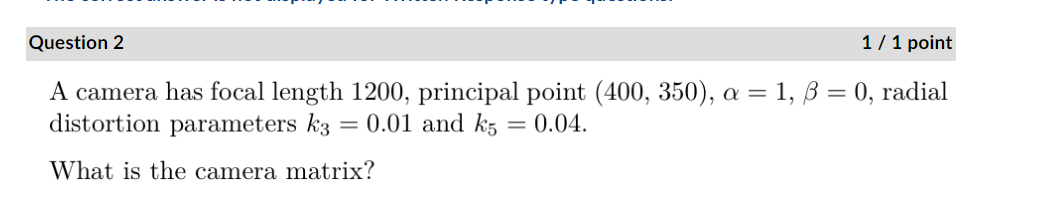

In [4]:
f = 1200
px = 400
py = 350
alfa = 1
beta = 0

k3 = 0.01
k5=0.04

K = np.array([[f, f*beta, px],
              [0, f*alfa, py],
              [0, 0, 1]])

print(K)

[[1200    0  400]
 [   0 1200  350]
 [   0    0    1]]


### QUIZ 2B

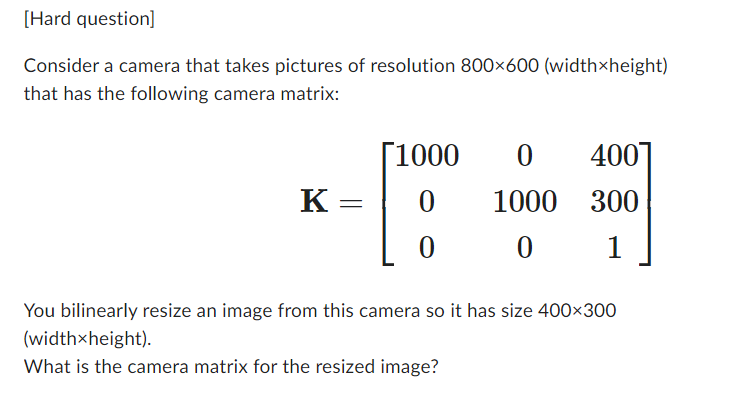

In [5]:
K = np.array([[1000, 0, 400],
              [0, 1000, 300],
              [0, 0, 1]])

#new camera matrix
scale_factor_x = 400/800
scale_factor_y = 300/600

new_px = scale_factor_x*400
new_py = scale_factor_y* 300

f = scale_factor_x * 1000

print(f, new_px, new_py)

500.0 200.0 150.0


## Lecture 3

### QUIZ 3.A

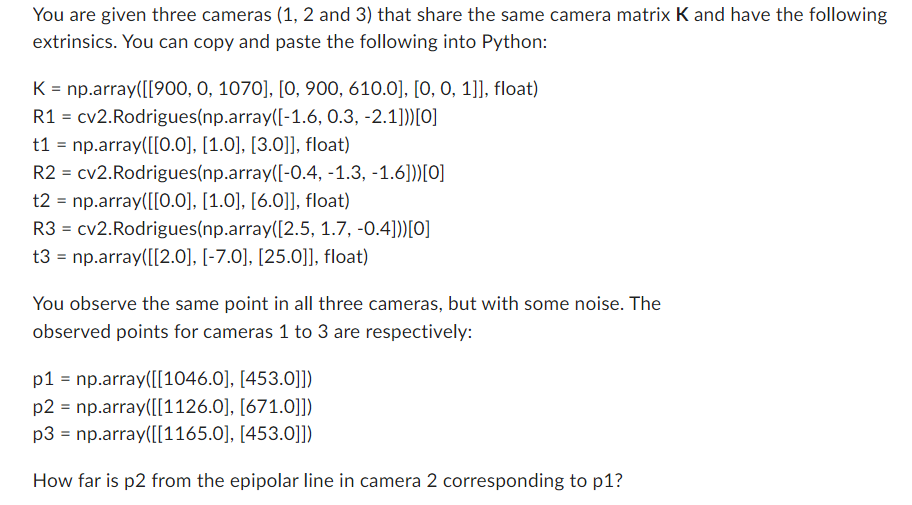

In [6]:
K = np.array([[900, 0, 1070], [0, 900, 610.0], [0, 0, 1]], float)
R1 = cv2.Rodrigues(np.array([-1.6, 0.3, -2.1]))[0]
t1 = np.array([[0.0], [1.0], [3.0]], float)
R2 = cv2.Rodrigues(np.array([-0.4, -1.3, -1.6]))[0]
t2 = np.array([[0.0], [1.0], [6.0]], float)
R3 = cv2.Rodrigues(np.array([2.5, 1.7, -0.4]))[0]
t3 = np.array([[2.0], [-7.0], [25.0]], float)

p1 = np.array([[1046.0], [453.0]])
p2 = np.array([[1126.0], [671.0]])
p3 = np.array([[1165.0], [453.0]])

In [7]:
F = utilis.fundamental_matrix(R1,t1,R2,t2,K, K)
q1 = utilis.PiInv(p1)
l2 = utilis.epipolar_line(F, q1)

#distance
l2 = l2/np.sqrt(l2[0]**2 + l2[1]**2)

distance = utilis.PiInv(p2).T@l2

print(distance)



[[-13.27182907]]


### QUIZ 3B
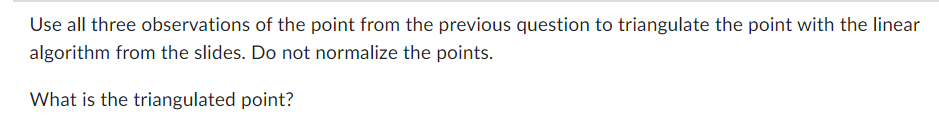

In [8]:
P1 = utilis.getProjection_Matrix(K, R1,t1)
P2 = utilis.getProjection_Matrix(K, R2,t2)
P3 = utilis.getProjection_Matrix(K, R3,t3)

p1 = np.array([[1046.0], [453.0]])
p2 = np.array([[1126.0], [671.0]])
p3 = np.array([[1165.0], [453.0]])

print("Q projected:\n", utilis.triangulate(np.hstack((p1, p2, p3)), [P1, P2, P3]))

Q projected:
 [[3.10058867]
 [0.74321098]
 [0.46490561]]


## Lecture 4

### QUIZ 4.A

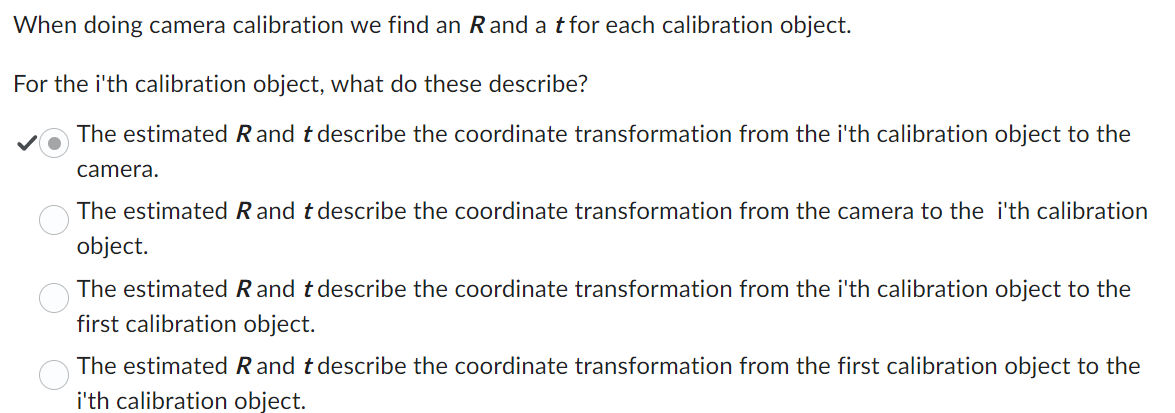

### QUIZ 4.B
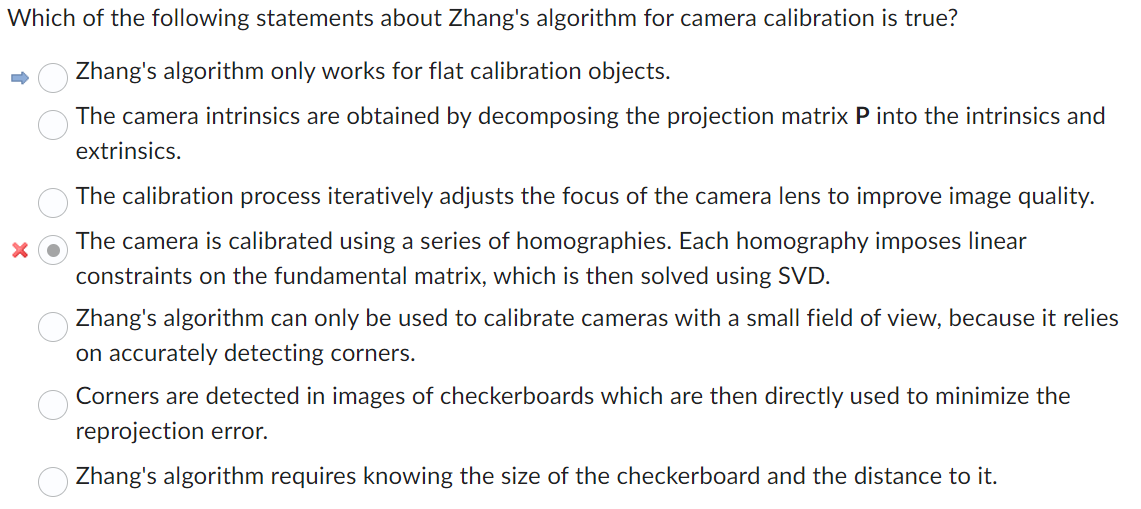

## Lecture 5

### QUIZ 5.A

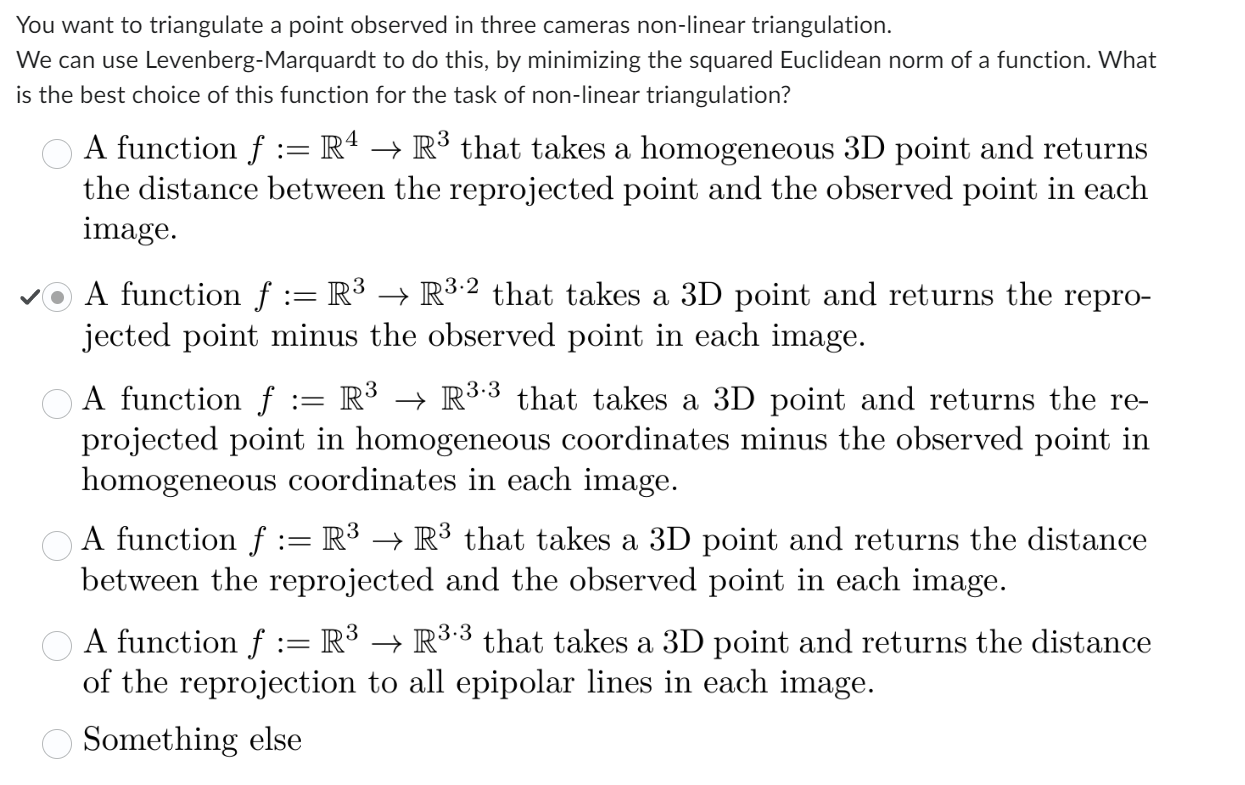


### QUIZ 5.B
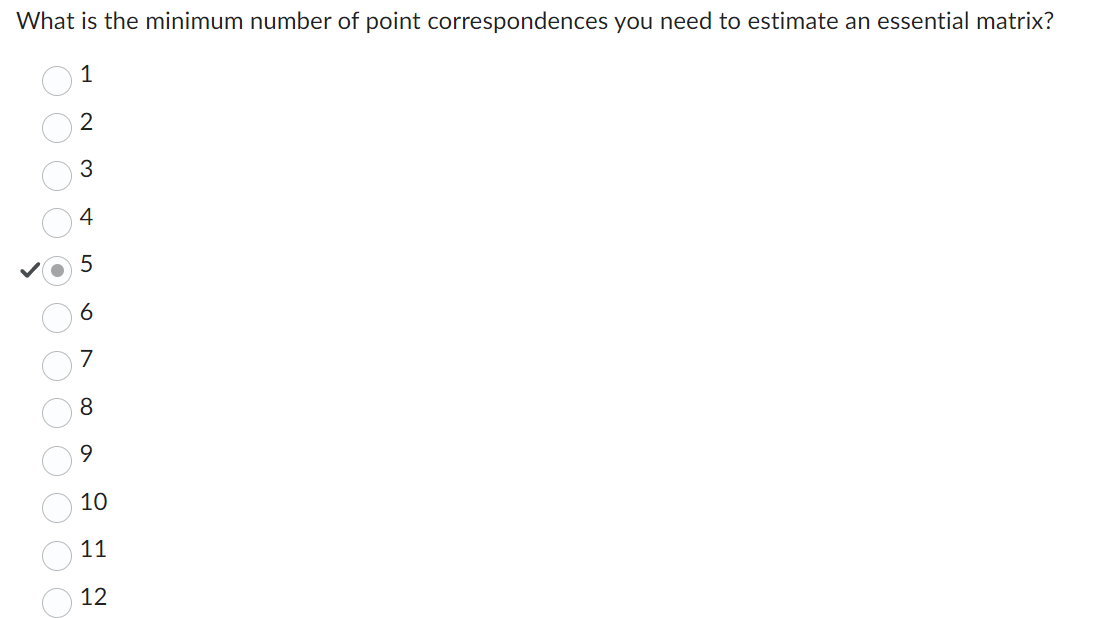

- Homography: Requires at least 4 point correspondences.
- Fundamental Matrix: Requires at least 8 point correspondences.
- Essential Matrix: Requires at least 5 point correspondences.

## Lecture 6

### QUIZ 6.A
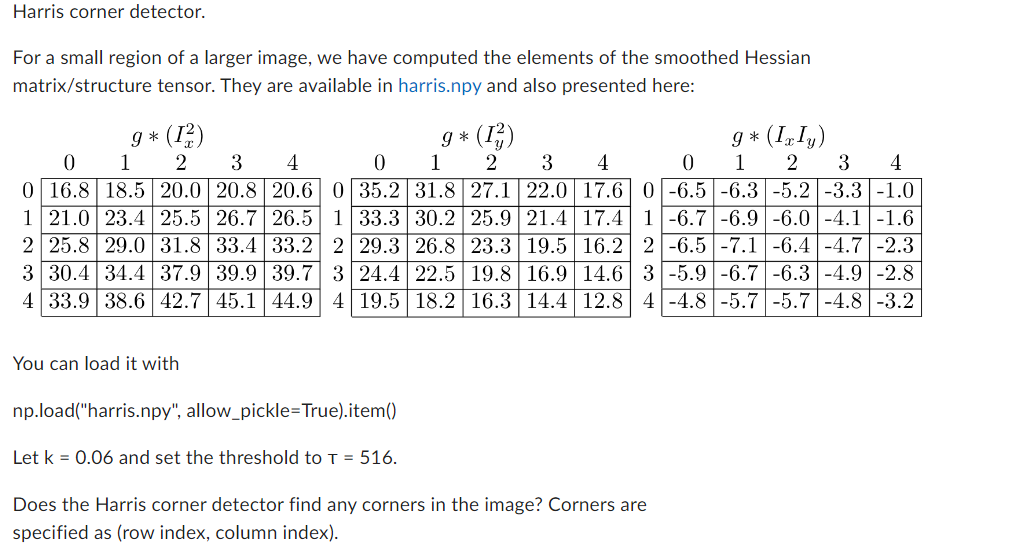

In [9]:
data = np.load("../images/harris.npy", allow_pickle=True).item()
data.keys()

Ix2 = data['g*(I_x^2)']
Iy2 = data['g*(I_y^2)']
Ixy = data['g*(I_x I_y)']

k = 0.06
tao = 516

# Compute determinant and trace of C
det_C = Ix2 * Iy2 - Ixy**2
trace_C = Ix2 + Iy2
# Compute the Harris corner metric
#r = det_C - k * (trace_C ** 2)

a, b, c = Ix2, Iy2, Ixy
# Compute the Harris corner metric
r = a*b - c**2 - k * (a + b)**2

threshold = 516
corners = np.argwhere(r > threshold)
print("Corners found at positions (row index, column index):")
for corner in corners:
    print(corner)

Corners found at positions (row index, column index):
[2 0]
[2 1]
[2 2]
[3 0]
[3 1]


#### 6B
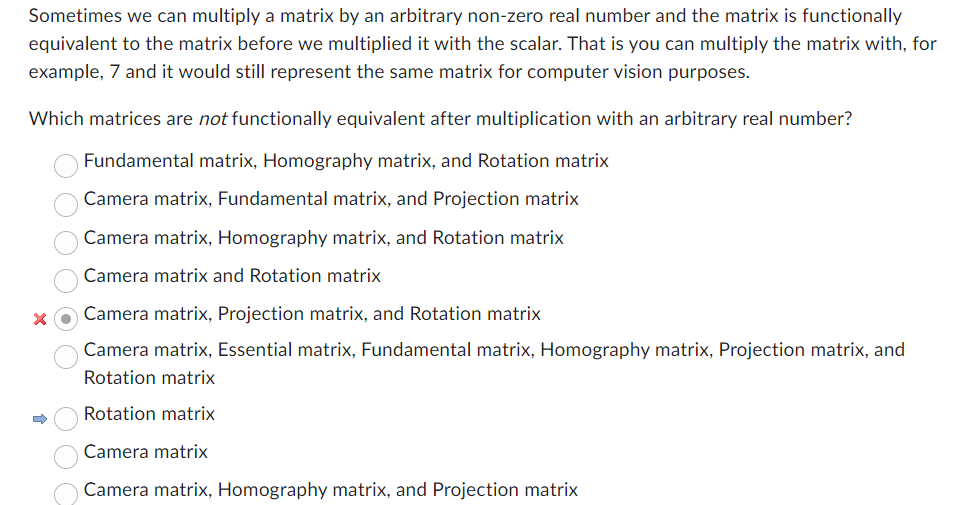

## Lecture 7

### QUIZ 7.A
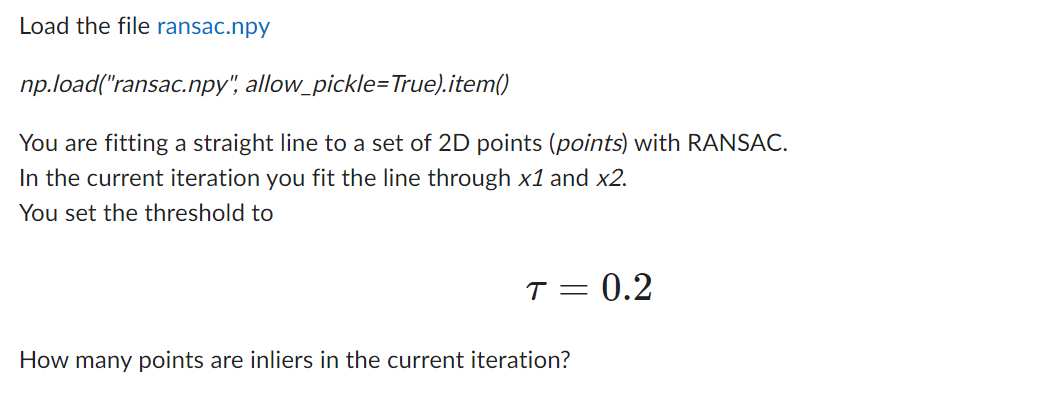

In [10]:
# ransac = np.load("../images/ransac.npy", allow_pickle=True).item()

# points = ransac['points']
# x1 = ransac['x1']
# x2 = ransac['x2']
# tao = 0.2

# print(x1.shape)
# # x1 = np.hstack((x1, 1))
# # x2 = np.hstack((x2, 1))


In [11]:
# line = utilis.est_line(x1, x2)
# n_inliers = utilis.consensus(line, points, tao)

# n_inliers


### QUIZ 7.B
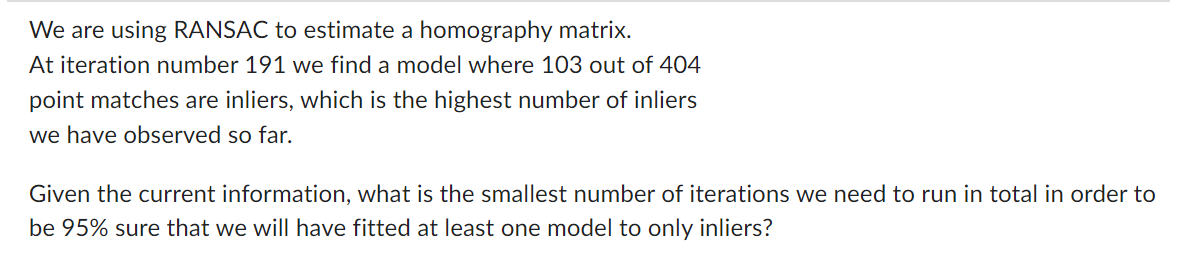

In [12]:
inliers = 103/404
outliers = 1 - inliers
p = 0.95
homography = 4

N = utilis.smallest_number_iterations(404, 103, 0.95, 4)

N.round()

708.0

## Lecture 8

### QUIZ 8.A
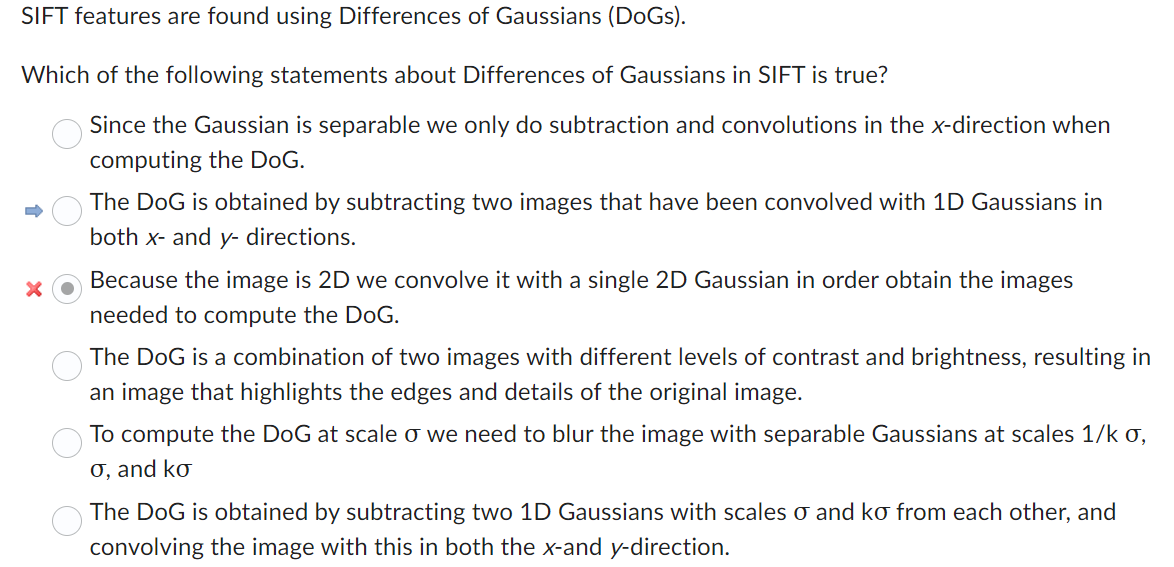

### QUIZ 8.B
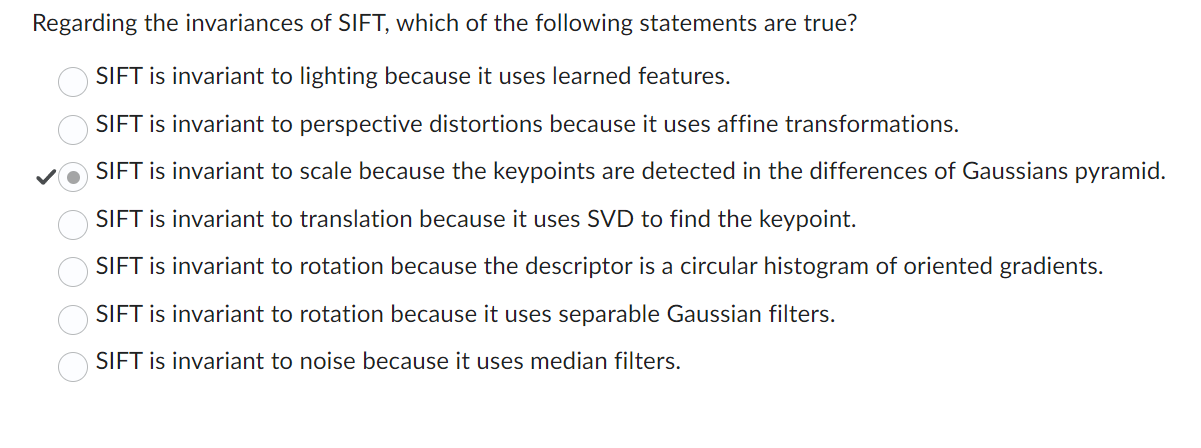

## Lecture 9

### QUIZ 9.A
![alt text](9_a.png)

Codimension in RANSAC:

In the context of RANSAC (RANdom SAmple Consensus), codimension refers to the difference between the dimensionality of the data space and the dimensionality of the model being estimated. It essentially tells you how many degrees of freedom (DOF) are left after fitting the model to the data.

#### Error Space:

The error space represents the set of all possible errors between the data points and the model being fitted. The dimensionality of this space depends on the type of model and the number of data points.

#### Thresholding and Codimension:

RANSAC uses a threshold to determine which data points are inliers (consistent with the model) and outliers (not well-represented by the model). This threshold is often set based on the codimension of the model.

#### Here's the connection:

A higher codimension (more degrees of freedom in the error space) typically allows for a larger threshold because there's more "room" for error before a data point is considered an outlier.
Conversely, a lower codimension (fewer degrees of freedom) necessitates a stricter threshold since there's less tolerance for error.
Examples:

Line fitting (codimension 1): Errors can occur in both the x and y directions. A larger threshold allows for some deviation from a perfect line.
Plane fitting (codimension 2): Errors can occur in x, y, and z directions. The threshold needs to be tighter because there's less freedom for error in fitting a plane.
By understanding codimension, you can set more appropriate thresholds in RANSAC for robust model estimation even in the presence of outliers.

### QUIZ 9.B
![alt text](9_b.png)
Here's why:

#### SVD 
(Singular Value Decomposition): While RANSAC might leverage SVD in some implementations to compute the fundamental matrix from a minimal set of points, it's not the primary purpose.
#### Feature Matching: 
Feature matching algorithms identify potential corresponding points between images. RANSAC operates on these matches, not the matching process itself.
#### Epipolar Lines: 
Calculating epipolar lines is a downstream application of the fundamental matrix. Once you have a good estimate (thanks to outlier removal), you can use the fundamental matrix to compute these lines.
#### RANSAC's Role in Fundamental Matrix Estimation:

The fundamental matrix relates corresponding points in two images captured by calibrated cameras. However, feature matching algorithms can be imperfect, leading to outliers (incorrect matches) alongside inliers (correct matches). RANSAC specifically addresses this issue:

#### Random Sampling: 
It selects a small subset of point correspondences at random.
#### Model Estimation: 
Based on this subset (assuming they're inliers), it estimates a fundamental matrix.
#### Inlier Counting:
RANSAC checks how many other correspondences agree with this estimated fundamental matrix (falling within a certain distance of predicted epipolar lines).
#### Iteration and Selection:
The process repeats many times, selecting different subsets. The fundamental matrix with the most inlier support is considered the best estimate.
#### Benefits of RANSAC:

By iteratively removing outliers, RANSAC provides a more robust estimate of the fundamental matrix, crucial for tasks like:

Structure from Motion (SfM): Reconstructing 3D scene geometry.
Multi-View Stereo (MVS): Generating dense depth maps.
Camera Calibration: Refining intrinsic camera parameters.
In essence, RANSAC helps you build a more accurate fundamental matrix foundation for various computer vision applications.

## Lecture 10

### QUIZ 10.A
![alt text](10_a.png)

In [13]:
import math

# Standard deviation of keypoint detection error
sigma = 2.6


# 90th percentile of the chi-squared distribution for 2 degrees of freedom
chi_squared_90th = 4.61

squared_threshold = chi_squared_90th * sigma**2
threshold = math.sqrt(squared_threshold)

print(squared_threshold)
print(threshold)

31.163600000000006
5.582436743931812


### QUIZ 10.B
![alt text](10_b.png)

## Lecture 11

### QUIZ 11.A
![alt text](11_a.png)

Here’s why: The essential matrix encapsulates the geometric information about the two cameras’ relative pose (rotation and translation) and the camera calibration. It can be estimated from point correspondences between two views, and it requires fewer correspondences to estimate compared to the fundamental matrix. Once the essential matrix is estimated, it can be decomposed to obtain the relative pose between the two cameras. This makes it a good choice for visual odometry tasks where the goal is to estimate the camera’s motion.
If the camera calibration is not known, the fundamental matrix would be used instead. 

### QUIZ 11.B
![alt text](11_b.png)

In [14]:
import numpy as np
k11 = 1
k12 = 2
k13 = 3
k21 = 4
k22 = 5
k23 = 6
k31 = 7
k32 = 8
k33 = 9
# Given camera matrix K
K = np.array([[k11,k12,k13],
              [k21,k22,k23],
              [k31,k32,k33]])

# Since the camera pose is aligned with the world coordinate system,
# the rotation matrix R is an identity matrix and the translation vector t is a zero vector.
R = np.eye(3)
t = np.zeros((3, 1))

# The extrinsic matrix [R|t] is an identity matrix augmented with a zero column.
RT = np.hstack([R, t])

# The projection matrix P is the product of the intrinsic matrix K and the extrinsic matrix [R|t].
P = np.dot(K, RT)

print("Projection matrix P:")
print(P)

Projection matrix P:
[[1. 2. 3. 0.]
 [4. 5. 6. 0.]
 [7. 8. 9. 0.]]


#### From projection matrix to Inner parameters of the camera
If 
P = np.array([
    [3000, 0, -1000, 1],
    [1000, 2000*np.sqrt(2), 1000, 2],
    [2, 0, 2, 3]
])
find the inner parameters of the camera.



In [15]:
P = np.array([
    [3000, 0, -1000, 1],
    [1000, 2000*np.sqrt(2), 1000, 2],
    [2, 0, 2, 3]
])

#Exctract A ---> A = RQ = KR, camera matrix per rotation matrix
A = P[:, :3]

# Perform RQ factorization
R, K = linalg.rq(A)


# Normalize K such that the bottom right element is 1 (optional based on how you want to interpret K)
K = K / K[2, 2]

# Ensure diagonal elements of K are positive (convention, may not be necessary)
K = np.diag(np.sign(np.diag(K))) @ K
R = R @ np.diag(np.sign(np.diag(K)))

print(K)

[[ 1.          0.         -1.        ]
 [ 0.          1.41421356  0.        ]
 [ 1.          0.          1.        ]]


#### Compute the Fundamental Matrix F from Epipolar Geometry

In [16]:
# Define camera matrices P1 and P2
P1 = np.eye(3, 4)  # [I | 0]
P2 = np.array([
    [1, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1]
])

# Calculate the epipole e2
C1 = np.array([0, 0, 0, 1])

C2 = np.array([[0], [0], [0], [1]])
e2 = P2 @ C1
e1 = P1 @C2

# Create the skew-symmetric matrix [e2]x
e2x = np.array([
    [0, -e2[2], e2[1]],
    [e2[2], 0, -e2[0]],
    [-e2[1], e2[0], 0]
])

# Calculate the fundamental matrix F
F = e2x @ P2[:, :3]  # assuming P2[:, :3] can be considered as A

# Verify that F e1 = 0, e2^T F = 0 and det(F) = 0
e1 = np.dot(F, e1)  # e1 from the context, using e2 due to context simplification
e2_T_F = np.dot(e2.T, F)
det_F = np.linalg.det(F)

print("F e1 = 0:", e1)
print("e2^T F = 0:", e2_T_F)
print("det(F) = 0:", det_F)

F e1 = 0: [[0.]
 [0.]
 [0.]]
e2^T F = 0: [0 0 0]
det(F) = 0: 0.0


#### Find camera matrix and 3D points given fundamental matrix and projections points



In [17]:
# Define the fundamental matrix F
F = np.array([
    [-1, 0, -1],
    [1, 1, 0],
    [0, 0, 0]
])

# Compute the null space of F^T to find e2
U, S, VT = np.linalg.svd(F.T)
e2 = VT.T[:, -1]

# Compute the skew-symmetric matrix [e2]x
e2x = np.array([
    [0, -e2[2], e2[1]],
    [e2[2], 0, -e2[0]],
    [-e2[1], e2[0], 0]
])

# Compute the second camera matrix P2
P2 = np.hstack((e2x @ F, e2.reshape(-1, 1)))

# Camera matrix P1
P1 = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0]
])

# Points in the image planes
x = np.array([[0.0], [1.0]])
x2 = np.array([[1], [1.0]])

# Calculate 3D point X (using triangulation or pseudo-inverse if exact solution is not possible)
X = utilis.triangulate(np.hstack((x, x2)), [P1, P2])

print("Camera Matrix P1:")
print(P1)
print("Camera Matrix P2:")
print(P2)
print("3D point X that projects to x in P1 and x2 in P2:")
print(X)


Camera Matrix P1:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]
Camera Matrix P2:
[[-1. -1.  0.  0.]
 [-1.  0. -1.  0.]
 [ 0.  0.  0.  1.]]
3D point X that projects to x in P1 and x2 in P2:
[[ 0.]
 [-1.]
 [-1.]]


#### Finding all the epipolar lines given 2 projection matrix

In [18]:
# Define camera matrices
P = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
P_bar = np.array([[1, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 1]])

# Epipole e computation for P in P_bar's image
e = P_bar @ np.array([0, 0, 0, 1])

# Skew-symmetric matrix of e
e_x = np.array([[0, -e[2], e[1]], [e[2], 0, -e[0]], [-e[1], e[0], 0]])

# Compute the fundamental matrix F
F = e_x @ P_bar[:, :3]  # Assuming last column of P_bar is translation and ignoring it

# Example point x in the first image
x = np.array([1, 2, 1])

# Compute the corresponding epipolar line l in the second image
l = F @ x

print("Fundamental Matrix F:")
print(F)
print("Epipolar Line l for point x:")
print(l)


Fundamental Matrix F:
[[ 0 -1  0]
 [ 1  0  1]
 [ 0  0  0]]
Epipolar Line l for point x:
[-2  2  0]


#### Minimization between distance epipolar lines

In [19]:
def calculate_epipolar_lines_and_distances(F, x, x_bar):
    # Compute epipolar lines
    l = F @ x
    l_bar = F.T @ x_bar
    
    # Normalize lines for distance calculation
    l = l / np.linalg.norm(l[:2])
    l_bar = l_bar / np.linalg.norm(l_bar[:2])
    
    # Compute distances
    d_x_l = (l[0]*x[0] + l[1]*x[1] + l[2])**2 / (l[0]**2 + l[1]**2)
    d_xbar_lbar = (l_bar[0]*x_bar[0] + l_bar[1]*x_bar[1] + l_bar[2])**2 / (l_bar[0]**2 + l_bar[1]**2)
    
    return l, l_bar, d_x_l, d_xbar_lbar

# Example fundamental matrix F
F = np.array([[-1, 0, -1],
              [1, 1, 0],
              [0, 0, 0]])

# Example points (in homogeneous coordinates)
x = np.array([1, 2, 1])
x_bar = np.array([1, 1, 1])

# Calculate epipolar lines and distances
l, l_bar, distance_x_l, distance_xbar_lbar = calculate_epipolar_lines_and_distances(F, x, x_bar)

print("Epipolar line in the second image:", l)
print("Epipolar line in the first image:", l_bar)
print("Distance squared from x to l:", distance_x_l)
print("Distance squared from x_bar to l_bar:", distance_xbar_lbar)


Epipolar line in the second image: [-0.5547002   0.83205029  0.        ]
Epipolar line in the first image: [ 0.  1. -1.]
Distance squared from x to l: 1.2307692307692308
Distance squared from x_bar to l_bar: 0.0


#### Example of application of 
### Affine camera model

In [20]:
# Example data: image points and scene points
image_points = np.array([[1, 2], [3, 4], [5, 6]])  # (3 images, 2D points)
scene_points = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # 3 scene points in 3D

# Center the data
image_means = np.mean(image_points, axis=0)
scene_means = np.mean(scene_points, axis=0)

image_points_centered = image_points - image_means
scene_points_centered = scene_points - scene_means

# Form the measurement matrix M
M = np.hstack((image_points_centered.flatten(), scene_points_centered.flatten())).reshape(3, -1)

# Perform SVD
U, S, VT = np.linalg.svd(M, full_matrices=False)

# Extract camera matrices (simplified for illustration)
A = U[:, :3]  # Take first two columns for A
structure = S[:2] @ VT[:2, :]  # Simplified extraction

print("A matrix (camera parameters):")
print(A)
print("Structure matrix:")
print(structure)


A matrix (camera parameters):
[[ 0.87064112  0.35722405  0.33819376]
 [-0.49191293  0.6355786   0.59503068]
 [ 0.00238944  0.68442006 -0.72908399]]
Structure matrix:
[-1.71052601 -2.58888974 -0.27682506 -0.27682506  2.86571479]


### LECTURE 13
#### QUIZ 13
![alt text](13_a.png)


There are 16 data points forming a complete cycle (from the start to the repeat of the pattern).

Length of the Sequence (
𝑠
s): The number of frames or images captured for one complete cycle of the sinusoidal wave is 16.
Number of Periods (
𝑛
n): The number of complete cycles of the sinusoidal wave within one pattern is 1.

#### QUIZ 13_B
![alt text](13_b.png)


In [21]:
# h, w = theta0_masked.shape
# disparity = np.zeros((h, w)) # Disparity map
# matches0 = []
# matches1 = []
# # Iterate over all pixels
# for i in range(h): # ROW
#     for j0 in range(w): # COL
#         # Mask is valid
#         if mask0[i, j0]:
#             # Choose closest valid match, using the 
#             min_disp = None
#             for j1 in range(w):
#                 # Disparity along same row.
#                 disp = theta0_masked[i, j0] - theta1_masked[i, j1]
#                 if min_disp is None or np.abs(disp) < min_disp:
#                     disparity[i, j0] = j0 - j1
#                     min_disp = np.abs(disp)
#                     j_opt = j1
#             # Given valid mask in other frame as well
#             if mask1[i, j_opt]:
#                 # For valid pixel in camera0, a match in camera1
#                 matches0.append([j0, i])
#                 matches1.append([j_opt, i])

# disparity_value = disparity[360, 400]
# print("Disparity at (360, 400):", disparity_value)

![alt text](image.png)
![alt text](<image copy.png>)

In [22]:
import glob
def load_images(image_folder):
    # Load images from the specified folder
    image_paths = sorted(glob.glob(image_folder + "/*.png"))
    images = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) for image_path in image_paths]
    cv2.imshow("Stitched Image Processed", images)

    cv2.waitKey(0)
    return images

def calculate_phase(captured_images):
    num_patterns = len(captured_images)
    height, width = captured_images[0].shape

    sin_sum = np.zeros((height, width), dtype=np.float64)
    cos_sum = np.zeros((height, width), dtype=np.float64)

    for k in range(num_patterns):
        angle = 2 * np.pi * k / num_patterns
        sin_sum += captured_images[k] * np.sin(angle)
        cos_sum += captured_images[k] * np.cos(angle)

    phase = np.arctan2(sin_sum, cos_sum)
    return phase

def unwrap_phase(phase):
    # Simple phase unwrapping algorithm
    unwrapped_phase = np.unwrap(phase, axis=0)
    unwrapped_phase = np.unwrap(unwrapped_phase, axis=1)
    return unwrapped_phase

# Load real images
image_folder = 'ex_11_Visual_Odometry/sequence'
captured_images = load_images(image_folder)

# Calculate phase
phase = calculate_phase(captured_images)

# Unwrap phase
unwrapped_phase = unwrap_phase(phase)

# Visualize the phase map
cv2.imshow('Phase Map', unwrapped_phase)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat is not a numpy array, neither a scalar
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'
